In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cyberdf = pd.read_csv('Cyberpunk_2077_Steam_Reviews.csv')
cyberKeep = ['ReviewID', 'Rating', 'Hours Played', 'Received for Free', 'Update']
cyberdf = cyberdf[cyberKeep]

cyberdf['Hours Played'] = pd.to_numeric(cyberdf['Hours Played'], errors='coerce')
cyberdf = cyberdf.dropna(subset=['Hours Played'])
cyberdf['Hours Played'] = cyberdf['Hours Played'].astype(int)
cyberdf = cyberdf[cyberdf['Hours Played'] <= 1000]

cyberdf.shape

(755817, 5)

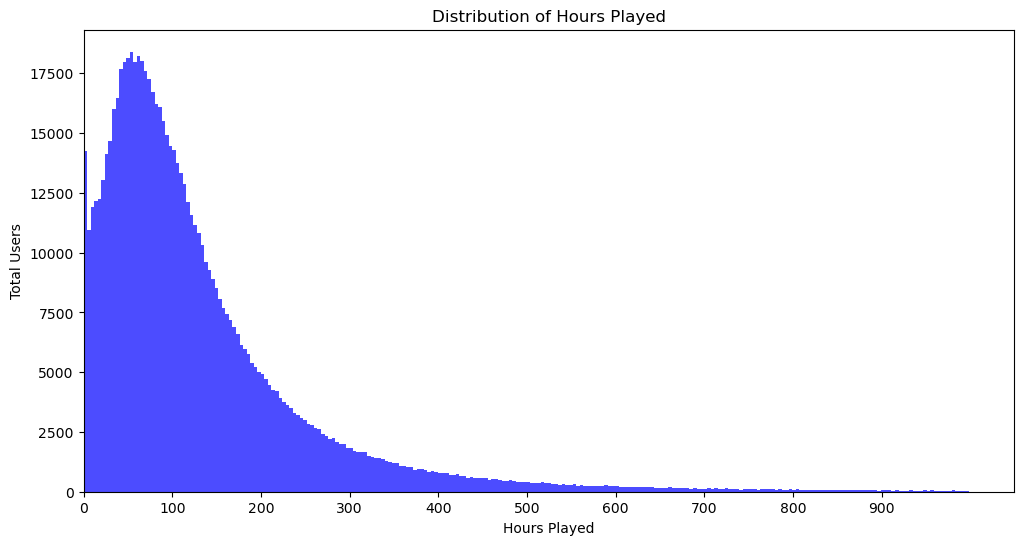

In [14]:
plt.figure(figsize=(12,6))
plt.hist(cyberdf['Hours Played'], bins=250, color='blue', alpha=0.7)

plt.title('Distribution of Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

plt.xticks(np.arange(0, cyberdf['Hours Played'].max() + 1, 100))
plt.xlim(left=0)

plt.show()

In [54]:
eldendf = pd.read_csv('df_eldenRing.csv')
cyberKeep = ['voted_up', 'author.playtime_at_review']
eldendf = eldendf[cyberKeep]
eldendf['author.playtime_at_review'] = eldendf['author.playtime_at_review']/60
eldendf['author.playtime_at_review'] = eldendf['author.playtime_at_review'].round().astype(int)

eldendf['author.playtime_at_review'] = pd.to_numeric(eldendf['author.playtime_at_review'], errors='coerce')
eldendf = eldendf.dropna(subset=['author.playtime_at_review'])
eldendf['author.playtime_at_review'] = eldendf['author.playtime_at_review']
eldendf = eldendf[eldendf['author.playtime_at_review'] <= 1000]

eldendf.shape

C:\Users\MSI\AppData\Local\Temp\ipykernel_4920\2236699462.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  eldendf = pd.read_csv('df_eldenRing.csv')


(500343, 2)

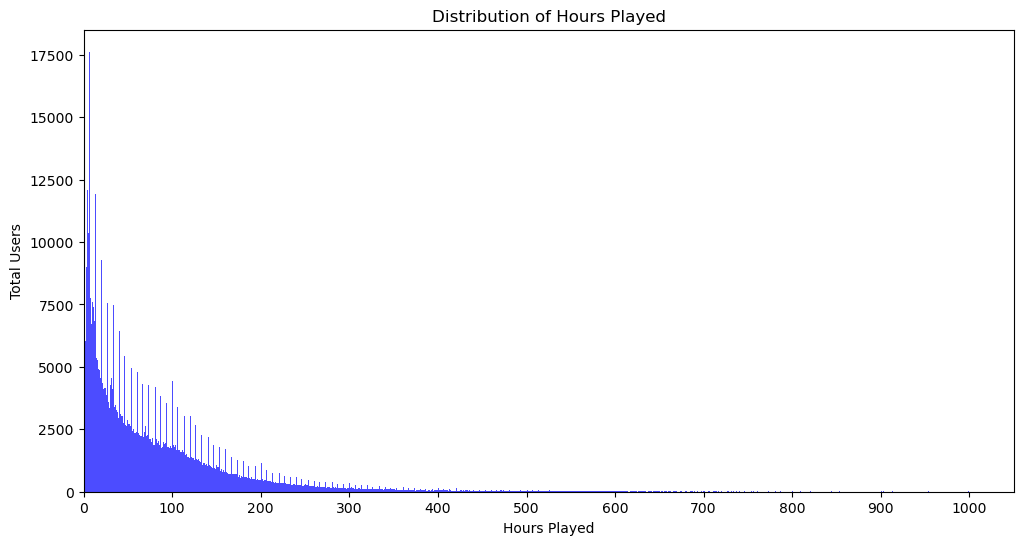

In [67]:
plt.figure(figsize=(12,6))
plt.hist(eldendf['author.playtime_at_review'], bins=850, color='blue', alpha=0.7)

plt.title('Distribution of Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

plt.xticks(np.arange(0, eldendf['author.playtime_at_review'].max() + 1, 100))
plt.xlim(left=0)

plt.show()

In [ ]:
nomandf = pd.read_csv('No_Mans_Sky_Reviews.csv')
nomanKeep = ['Hours Played']
nomandf = nomandf[nomanKeep]
nomandf['Hours Played'] = pd.to_numeric(nomandf['Hours Played'], errors='coerce')
nomandf = nomandf.dropna(subset=['Hours Played'])
nomandf = nomandf[nomandf['Hours Played'] <= 1000]

nomandf.shape

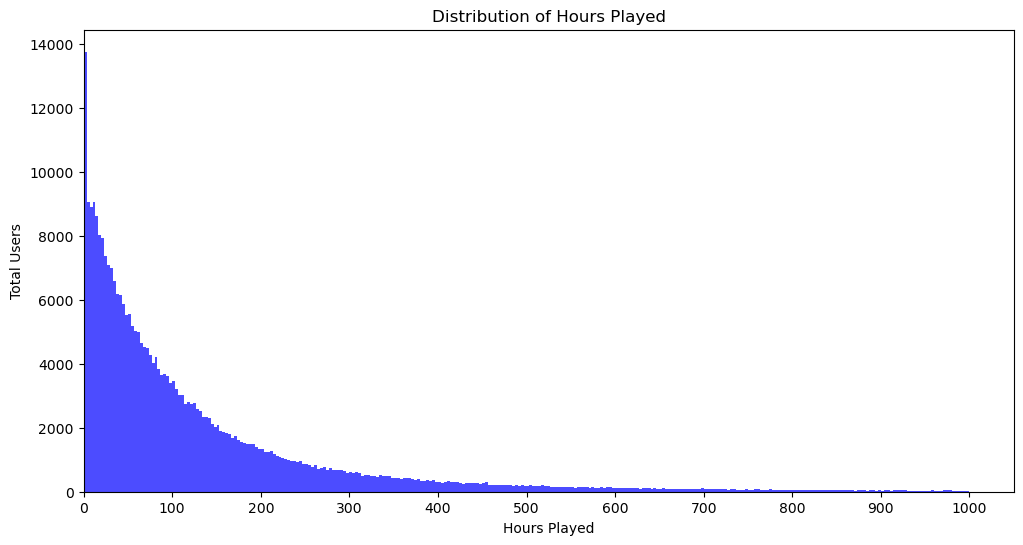

In [34]:
plt.figure(figsize=(12,6))
plt.hist(nomandf['Hours Played'], bins=300, color='blue', alpha=0.7)

plt.title('Distribution of Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

plt.xticks(np.arange(0, nomandf['Hours Played'].max() + 1, 100))
plt.xlim(left=0)

plt.show()

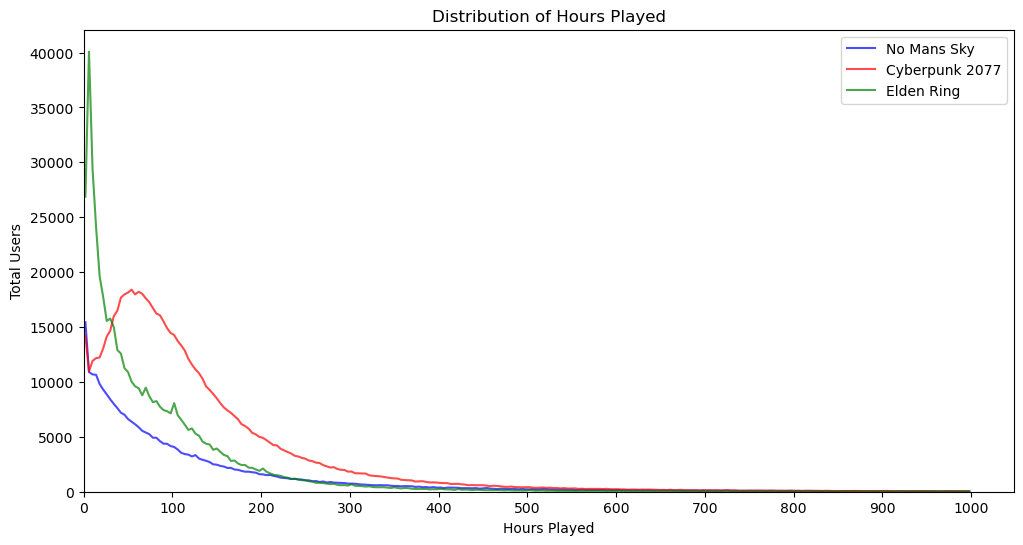

In [71]:
counts_nms, bin_edges_nms = np.histogram(nomandf['Hours Played'], bins=250)
counts_cp, bin_edges_cp = np.histogram(cyberdf['Hours Played'], bins=250)
counts_er, bin_edges_er = np.histogram(eldendf['author.playtime_at_review'], bins=250)

bin_midpoints_nms = (bin_edges_nms[:-1] + bin_edges_nms[1:]) / 2
bin_midpoints_cp = (bin_edges_cp[:-1] + bin_edges_cp[1:]) / 2
bin_midpoints_er = (bin_edges_er[:-1] + bin_edges_er[1:]) / 2

plt.figure(figsize=(12, 6))

plt.plot(bin_midpoints_nms, counts_nms, color='blue', alpha=0.7, label='No Mans Sky')
plt.plot(bin_midpoints_cp, counts_cp, color='red', alpha=0.7, label='Cyberpunk 2077')
plt.plot(bin_midpoints_er, counts_er, color='green', alpha=0.7, label='Elden Ring')

plt.title('Distribution of Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

max_hours = max(nomandf['Hours Played'].max(), cyberdf['Hours Played'].max(), eldendf['author.playtime_at_review'].max())
plt.xticks(np.arange(0, max_hours + 1, 100))
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.legend()
plt.show()


In [145]:
#Showing info from the data
cyberdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755817 entries, 0 to 760329
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ReviewID           755817 non-null  int64 
 1   Rating             755817 non-null  object
 2   Hours Played       755817 non-null  int32 
 3   Received for Free  755817 non-null  bool  
 4   Update             755817 non-null  object
dtypes: bool(1), int32(1), int64(1), object(2)
memory usage: 26.7+ MB


In [147]:
#Showing the first 5 rows
cyberdf.head(5)

,ReviewID,Rating,Hours Played,Received for Free,Update
0,81918897,Recommended,401,False,Release
1,81918903,Recommended,247,True,Release
3,81918912,Recommended,8,False,Release
4,81918918,Not Recommended,86,True,Release
5,81918923,Recommended,27,True,Release


In [131]:
#Showing the last 5 rows
cyberdf.tail(5)

,ReviewID,Rating,Hours Played,Received for Free,Update
760325,172729321,0,16,0,Patch 2.12
760326,172729968,0,20,0,Patch 2.12
760327,172730150,0,215,0,Patch 2.12
760328,172730437,0,25,0,Patch 2.12
760329,172731691,0,130,0,Patch 2.12


In [135]:
#Describe
cyberdf['Hours Played'].describe()

count    755817.000000
mean        131.014357
std         125.600719
min           0.000000
25%          51.000000
50%          96.000000
75%         167.000000
max         999.000000
Name: Hours Played, dtype: float64

In [137]:
#Checking for missing values
cyberdf.isnull()

#Checks for missing values in each column
cyberdf.isnull().sum()

ReviewID             0
Rating               0
Hours Played         0
Received for Free    0
Update               0
dtype: int64

In [41]:
#Handling Duplicates
cyberdf = cyberdf.drop_duplicates()
cyberdf.shape

(755817, 5)

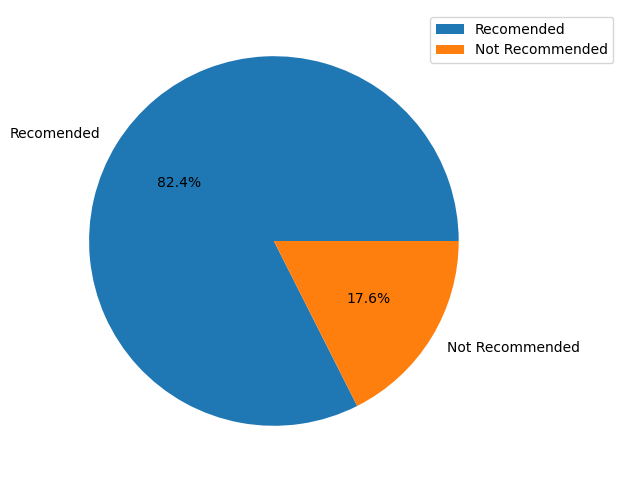

In [43]:
#Rating Piechart
plt.figure(figsize=(8,6))

ratingTotal = cyberdf['Rating'].value_counts()
plt.pie(ratingTotal, labels=['Recomended', 'Not Recommended'], autopct='%1.1f%%')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

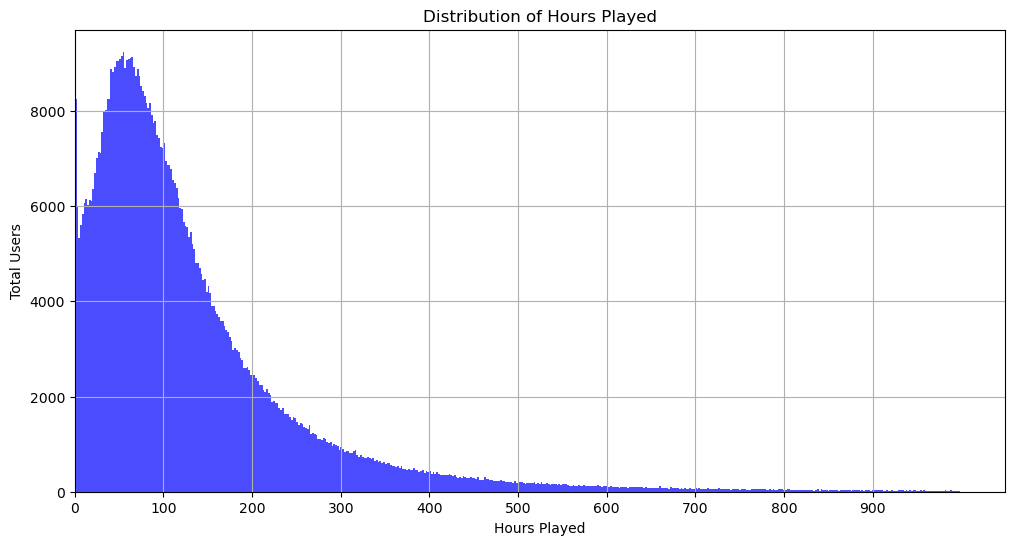

In [47]:
#Total Hours Played Graph
cyberdf['Hours Played'] = pd.to_numeric(cyberdf['Hours Played'], errors='coerce')
cyberdf = cyberdf.dropna(subset=['Hours Played'])

plt.figure(figsize=(12,6))
plt.hist(cyberdf['Hours Played'], bins=500, color='blue', alpha=0.7)
plt.title('Distribution of Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

plt.xticks(np.arange(0, cyberdf['Hours Played'].max() + 1, 100))
plt.xlim(left=0)
plt.grid(True)
plt.show()

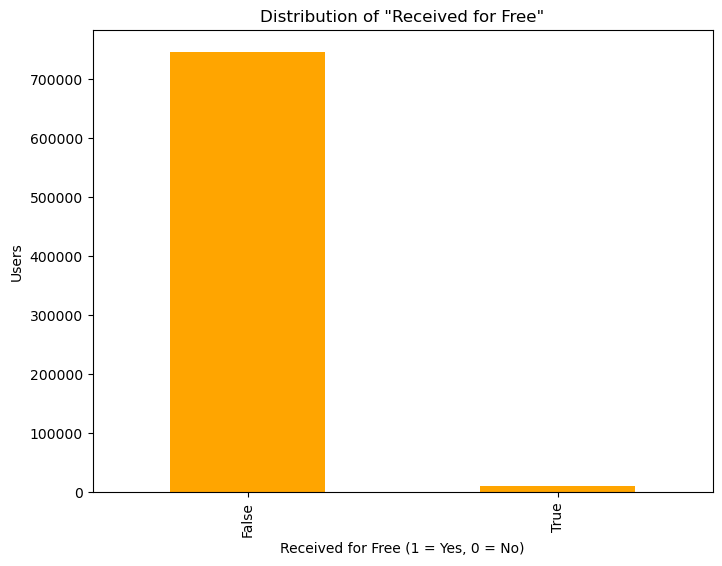

In [49]:
#Received for Free Graph
plt.figure(figsize=(8,6))
cyberdf['Received for Free'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of "Received for Free"')
plt.xlabel('Received for Free (1 = Yes, 0 = No)')
plt.ylabel('Users')
plt.show()

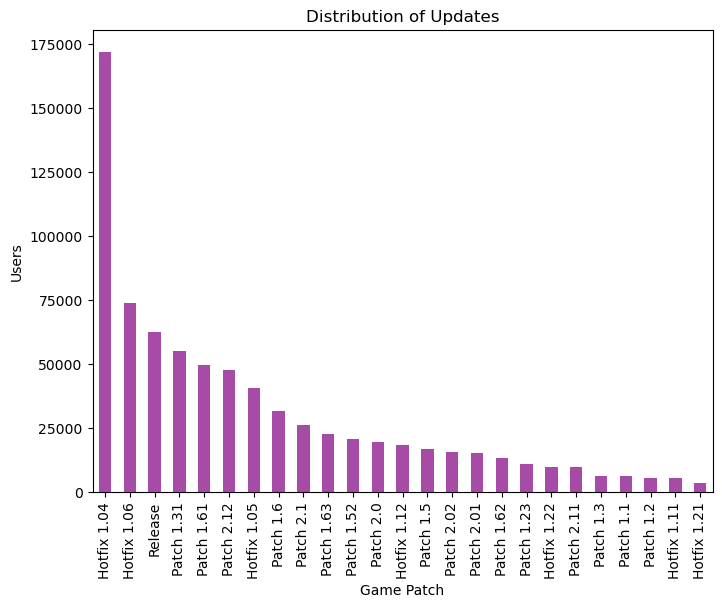

In [51]:
#Update Graph
plt.figure(figsize=(8,6))
cyberdf['Update'].value_counts().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Distribution of Updates')
plt.xlabel('Game Patch')
plt.ylabel('Users')
plt.show()

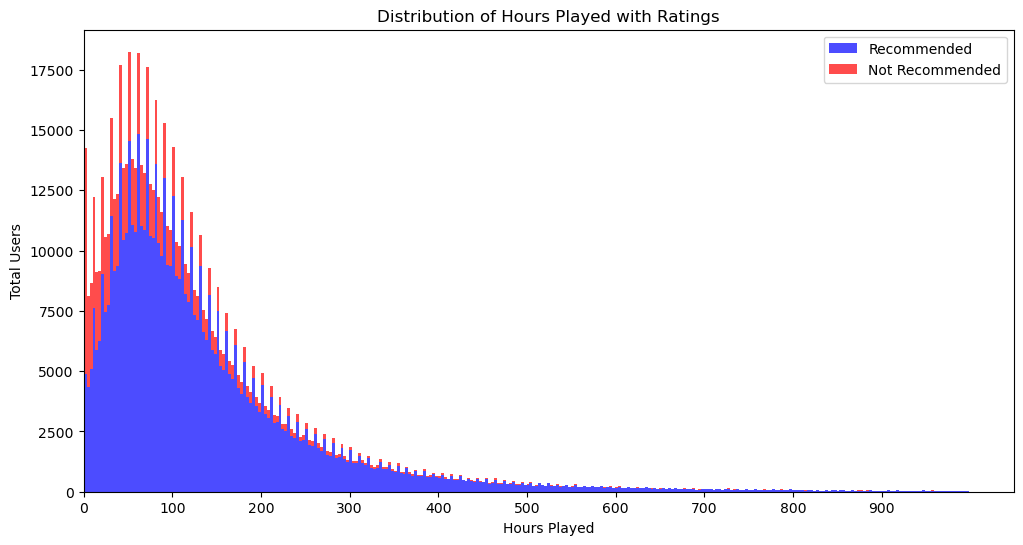

In [53]:
#Relation between Hours Played and Rating
recommended = cyberdf[cyberdf['Rating'] == 'Recommended']
not_recommended = cyberdf[cyberdf['Rating'] == 'Not Recommended']

plt.figure(figsize=(12, 6))
plt.hist([recommended['Hours Played'], not_recommended['Hours Played']], bins=300, stacked=True,
         color=['blue', 'red'], alpha=0.7, label=['Recommended', 'Not Recommended'])
plt.title('Distribution of Hours Played with Ratings')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

plt.xticks(np.arange(0, cyberdf['Hours Played'].max() + 1, 100))
plt.xlim(left=0)
plt.legend()
plt.show()

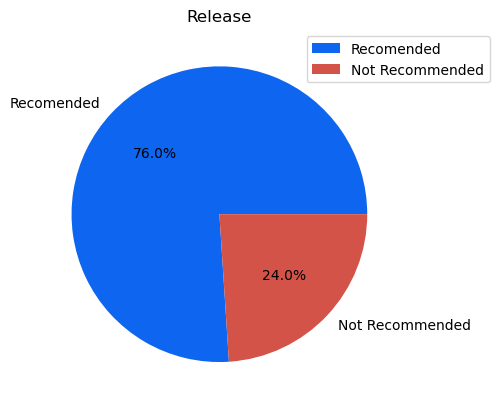

In [55]:
#Relation between Release and Rating
plt.title('Release')
release = cyberdf[cyberdf['Update'] == 'Release']
releaseRating = release['Rating'].value_counts()
plt.pie(releaseRating, labels=['Recomended', 'Not Recommended'], autopct='%1.1f%%', colors=['#0E65EF', '#D35348'])
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1))
plt.show()

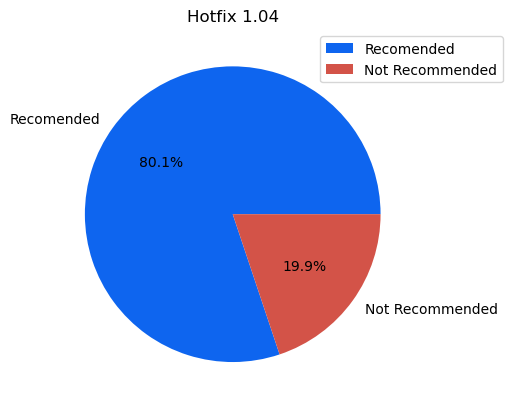

In [57]:
#Relation between Hotfix 1.04 and Rating
hotfix1_04 = cyberdf[cyberdf['Update'] == 'Hotfix 1.04']
hotfix1_04Rating = hotfix1_04['Rating'].value_counts()
plt.pie(hotfix1_04Rating, labels=['Recomended', 'Not Recommended'], autopct='%1.1f%%', colors=['#0E65EF', '#D35348'])
plt.title('Hotfix 1.04')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1))
plt.show()

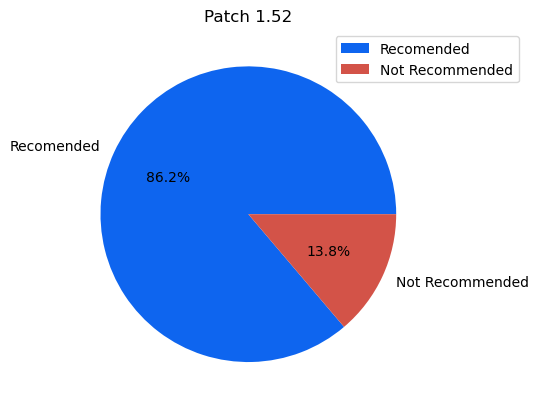

In [59]:
#Relation between Patch 1.52 and Rating
patch1_52 = cyberdf[cyberdf['Update'] == 'Patch 1.52']
patch1_52Rating = patch1_52['Rating'].value_counts()
plt.pie(patch1_52Rating, labels=['Recomended', 'Not Recommended'], autopct='%1.1f%%', colors=['#0E65EF', '#D35348'])
plt.title('Patch 1.52')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1))
plt.show()

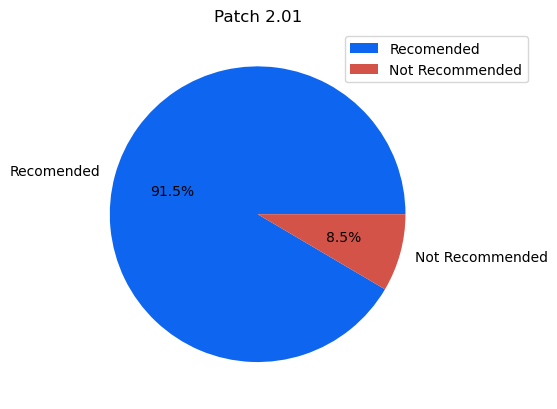

In [61]:
#Relation between Patch 2.01 and Rating
patch2_01 = cyberdf[cyberdf['Update'] == 'Patch 2.01']
patch2_01Rating = patch2_01['Rating'].value_counts()
plt.pie(patch2_01Rating, labels=['Recomended', 'Not Recommended'], autopct='%1.1f%%', colors=['#0E65EF', '#D35348'])
plt.title('Patch 2.01')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1))
plt.show()

In [153]:
# Unique values in 'Rating' column
cyberdf['Rating'].unique()

# Unique values in 'Received for Free' column
cyberdf['Received for Free'].unique()

# Unique values in 'Update' column
cyberdf['Update'].unique()


array(['Release', 'Hotfix 1.04', 'Hotfix 1.05', 'Hotfix 1.06',
       'Patch 1.1', 'Hotfix 1.11', 'Hotfix 1.12', 'Patch 1.2',
       'Hotfix 1.21', 'Hotfix 1.22', 'Patch 1.23', 'Patch 1.3',
       'Patch 1.31', 'Patch 1.5', 'Patch 1.52', 'Patch 1.6', 'Patch 1.61',
       'Patch 1.62', 'Patch 1.63', 'Patch 2.0', 'Patch 2.01',
       'Patch 2.02', 'Patch 2.1', 'Patch 2.12', 'Patch 2.11'],
      dtype=object)

In [155]:
# Count of unique values in 'Rating' column
cyberdf['Rating'].value_counts()

# Count of unique values in 'Received for Free' column
cyberdf['Received for Free'].value_counts()

# Count of unique values in 'Update' column
cyberdf['Update'].value_counts()


Update
Hotfix 1.04    171807
Hotfix 1.06     73624
Release         62295
Patch 1.31      54837
Patch 1.61      49525
Patch 2.12      47517
Hotfix 1.05     40369
Patch 1.6       31510
Patch 2.1       26050
Patch 1.63      22414
Patch 1.52      20719
Patch 2.0       19379
Hotfix 1.12     18411
Patch 1.5       16910
Patch 2.02      15594
Patch 2.01      14986
Patch 1.62      13277
Patch 1.23      10819
Hotfix 1.22      9735
Patch 2.11       9561
Patch 1.3        6211
Patch 1.1        6170
Patch 1.2        5552
Hotfix 1.11      5250
Hotfix 1.21      3295
Name: count, dtype: int64

In [157]:
cyberdf['Rating'] = cyberdf['Rating'].apply(lambda x: 1 if x == 'Recommended' else 0)

#Convert 'Received for Free' column to 1 for True and 0 for False
cyberdf['Received for Free'] = cyberdf['Received for Free'].astype(int)

def one_hot_encode(column):
    unique_values = column.unique()
    one_hot_dict = {f"{column.name}_{value}": [] for value in unique_values}  # Create a dict for one-hot columns
    
    for value in column:
        for unique_value in unique_values:
            one_hot_dict[f"{column.name}_{unique_value}"].append(1 if value == unique_value else 0)
    
    return one_hot_dict
    
update_encoded = one_hot_encode(cyberdf['Update'])
update_encoded_df = pd.DataFrame(update_encoded)
cyberdf_encoded = pd.concat([cyberdf.drop(columns=['Update']), update_encoded_df], axis=1)

#Convert all one-hot encoded columns (True/False) to 0/1
cyberdf_encoded = cyberdf_encoded.astype(int)
cyberdf_encoded.head(15)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer